<a href="https://colab.research.google.com/github/Nastarii/Malicious-URL-Detection/blob/main/CyberSecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cyber Security Project

 **Objective:** Train algorithms to automate employees protection

In [1]:
from google.colab import drive

drive.mount('./drive')

Mounted at ./drive


## Malicious URL Detection

In [2]:
#@title Packages
!pip install -qq itables

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.4 MB/s eta 0:00:00


In [3]:
#@title Libraries
from urllib.parse import urlsplit
from itables import init_notebook_mode
from google.colab.data_table import DataTable

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
#@title Settings

DataTable.max_columns = 32
init_notebook_mode(all_interactive=True)
sns.set_theme()

In [5]:
#@title Read DataFrame

df = pd.read_csv('./drive/MyDrive/MyCompany/malicious_phish.csv')
df.head(50)

url        type
0                                    br-icloud.com.br    phishing
1                 mp3raid.com/music/krizz_kaliko.html      benign
2                     bopsecrets.org/rexroth/cr/1.htm      benign
3   http://www.garage-pirenne.be/index.php?option=...  defacement
4   http://adventure-nicaragua.net/index.php?optio...  defacement
5   http://buzzfil.net/m/show-art/ils-etaient-loin...      benign
6       espn.go.com/nba/player/_/id/3457/brandon-rush      benign
7      yourbittorrent.com/?q=anthony-hamilton-soulife      benign
8        http://www.pashminaonline.com/pure-pashminas  defacement
9       allmusic.com/album/crazy-from-the-heat-r16990      benign
10  corporationwiki.com/Ohio/Columbus/frank-s-bens...      benign
11  http://www.ikenmijnkunst.nl/index.php/expositi...  defacement
12                     myspace.com/video/vid/30602581      benign
13  http://www.lebensmittel-ueberwachung.de/index....  defacement
14  http://www.szabadmunkaero.hu/cimoldal.html?sta...  defacement
15   http://larcadelcarnevale.com/catalogo/palloncini  defacement
16       quickfacts.census.gov/qfd/maps/iowa_map.html      benign
17  nugget.ca/ArticleDisplay.aspx?archive=true&e=1...      benign
18     uk.linkedin.com/pub/steve-rubenstein/8/718/755      benign
19                 http://www.vnic.co/khach-hang.html  defacement
20   baseball-reference.com/players/h/harrige01.shtml      benign
21         signin.eby.de.zukruygxctzmmqi.civpro.co.za    phishing
22                192.com/atoz/people/oakley/patrick/      benign
23  nytimes.com/1998/03/29/style/cuttings-oh-that-...      benign
24                  escholarship.org/uc/item/5xt4952c      benign
25                  songfacts.com/detail.php?id=13410      benign
26                     casamanana.org/education/blba/      benign
27  http://hollywoodlife.com/2014/05/01/rihanna-ih...      benign
28  http://www.marketingbyinternet.com/mo/e56508df...    phishing
29                 en.wikipedia.org/wiki/North_Dakota      benign
30  soaps.sheknows.com/daysofourlives/news/id/2025...      benign
31  perfectpeople.net/celebrity-star/6920/gidget-g...      benign
32             media.caltech.edu/press_releases/13186      benign
33                  wikiobits.com/Obits/TonyProudfoot      benign
34  vanderbilt.rivals.com/viewcoach.asp?coach=2079...      benign
35  http://peluqueriadeautor.com/index.php?option=...  defacement
36   movies.yahoo.com/shop?d=hv&cf=info&id=1800340831      benign
37                      cyndislist.com/us/pa/counties      benign
38  http://www.824555.com/app/member/SportOption.p...     malware
39       http://www.raci.it/component/user/reset.html  defacement
40  https://docs.google.com/spreadsheet/viewform?f...    phishing
41                 psychology.wikia.com/wiki/Phonemes      benign
42               info.centriq.com/content/fivereasons      benign
43  articles.baltimoresun.com/1991-06-11/sports/19...      benign
44                                    infinitysw.com/      benign
45                        strawberrycreekgardens.com/      benign
46  http://earth-sure.com/industrial-tech/everlast...  defacement
47                      spoke.com/dir/p/desantis/nick      benign
48                    wordsmith.org/words/pignus.html      benign
49  http://interpark.com/displaycorner/FreeMarket....      benign

In [6]:
#@title General Info
df.describe()

url    type
count                                              651191  651191
unique                                             641119       4
top     http://style.org.hc360.com/css/detail/mysite/s...  benign
freq                                                  180  428103

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


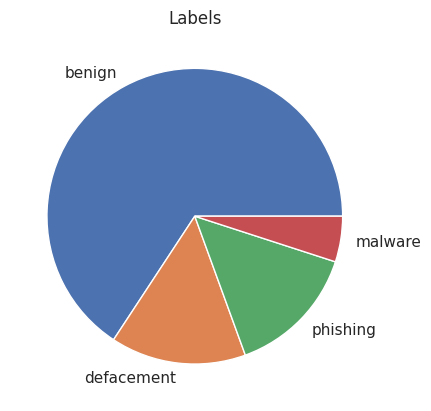

In [8]:
#@title Distribution
plt.figure()

df['type'].value_counts().plot(kind='pie')
plt.title('Labels')
plt.gca().set_ylabel('')
plt.show()

# Preprocessing

In [ ]:
#@title Extract Features

df['ext_type'] = df['url'].apply(lambda x: urlsplit(x).path.rsplit('.', 1)[-1] if '.' in urlsplit(x).path else 'None')

value_counts = df['ext_type'].value_counts()
values_to_replace = value_counts.nlargest(8).index

df.loc[~df['ext_type'].isin(values_to_replace), 'ext_type'] = 'None'

df['has_http'] = df['url'].str.contains('http://').astype(int)

df['has_org'] = df['url'].str.contains('org').astype(int)

df['has_query'] = df['url'].str.contains('\?').astype(int)

df['count_routes'] = df['url'].str.replace('http://', '').str.count('/')

df['count_routes'] = df['count_routes'].where(df['count_routes'] <= 4, 4)

In [ ]:
df.iloc[:,1:].head()

type ext_type  has_http  has_org  has_query  count_routes
0    phishing     None         0        0          0             0
1      benign     html         0        0          0             2
2      benign      htm         0        1          0             3
3  defacement      php         1        0          1             1
4  defacement      php         1        0          1             1

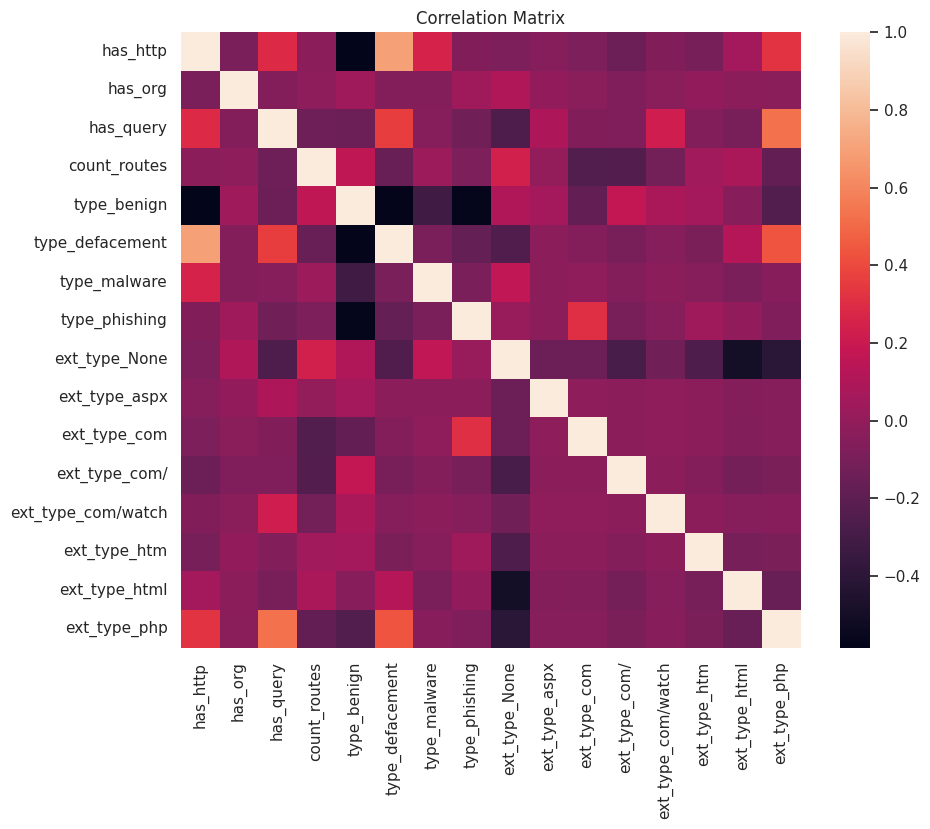

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(pd.get_dummies(df.iloc[:, 1:]).corr(numeric_only=True))
plt.title('Correlation Matrix')
plt.show()

In [ ]:
y_mapping = {
    0:'benign',
    1:'defacement', 
    2:'malware', 
    3:'phishing'
}

df['count_routes'] = df['count_routes'].astype(str)

X,y = pd.get_dummies(df.iloc[:, 2:]), df['type'].replace({v: k for k, v in y_mapping.items()})

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Perform random undersampling to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split samples
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1337)

print('X_train shape is', X_train.shape)
print('y_train shape is', y_train.shape)
print('X_test shape is', X_test.shape)
print('y_test shape is', y_test.shape)

print(pd.value_counts(y_train))

X_train shape is (104064, 16)
y_train shape is (104064,)
X_test shape is (26016, 16)
y_test shape is (26016,)
3    26076
1    26037
0    25986
2    25965
Name: type, dtype: int64


In [ ]:
!pip install -qq tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xarray 2022.12.0 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.


In [ ]:
import tensorflowjs as tfjs
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score

num_classes = 4

# Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # num_classes is the number of classes in your target variable
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=4, validation_data=(X_test, y_test))

# Make predictions on the testing data
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/4
3252/3252 [==============================] - 12s 3ms/step - loss: 0.7019 - accuracy: 0.6923 - val_loss: 0.6700 - val_accuracy: 0.7078
Epoch 2/4
3252/3252 [==============================] - 8s 3ms/step - loss: 0.6734 - accuracy: 0.7036 - val_loss: 0.6699 - val_accuracy: 0.7067
Epoch 3/4
3252/3252 [==============================] - 7s 2ms/step - loss: 0.6706 - accuracy: 0.7043 - val_loss: 0.6646 - val_accuracy: 0.7085
Epoch 4/4
813/813 [==============================] - 1s 2ms/step
Accuracy: 0.7074492619926199
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.56      0.63      6534
           1       0.83      0.82      0.83      6483
           2       0.65      0.87      0.75      6555
           3       0.65      0.57      0.61      6444

    accuracy                           0.71     26016
   macro avg       0.71      0.71      0.70     26016
weighted avg       0.71      0.71      0.70     26016



In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier

# create a default XGBoost classifier
model = XGBClassifier(n_estimators=500, random_state=42)


# Instantiate the XGBoost classifier for multi-class classification
model = XGBClassifier(objective='multi:softmax')

# Train the model
model.fit(X_train, y_train, verbose=True)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7095249077490775
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.71      0.68      6534
           1       0.83      0.82      0.83      6483
           2       0.65      0.87      0.75      6555
           3       0.72      0.43      0.54      6444

    accuracy                           0.71     26016
   macro avg       0.72      0.71      0.70     26016
weighted avg       0.72      0.71      0.70     26016



Text(0.5, 19.049999999999997, 'Real')

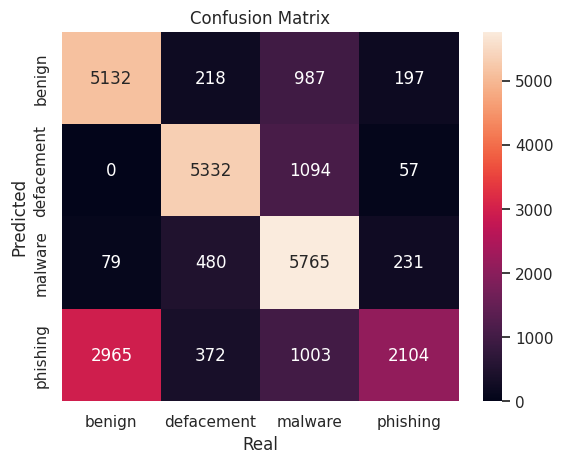

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=[v for v in y_mapping.values()], 
            yticklabels=[v for v in y_mapping.values()], annot=True, fmt=".0f")

plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Real')

In [ ]:
import pickle

# Assuming you have a trained XGBClassifier object called 'model'
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, 'content/')

In [ ]:
import tensorflow as tf

# Supondo que você tenha um modelo treinado chamado 'model'

# Salvar o modelo em formato JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Salvar os pesos do modelo em formato HDF5
model.save_weights("model_weights.h5")

print("Modelo salvo em JSON com sucesso.")

Modelo salvo em JSON com sucesso.
